In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Question 1:

In [65]:
array = np.random.randint(1, 101, size=(5, 5))
print("Original Array:\n",array)

Original Array:
 [[32 14 72 57 25]
 [80 42 19 41 55]
 [80 12 39 94  2]
 [96 45 89 25 68]
 [83  4 77 36 87]]


(a) Extract and print the middle element

In [66]:
middle_element = array[2, 2]
print(f"\nMiddle Element of the Array: {middle_element} \n")


Middle Element of the Array: 39 



(b) Calculate and print the mean of each row

In [67]:
row_means = np.mean(array, axis=1)
print("\nMean of Each Row:")
print(row_means)


Mean of Each Row:
[40.  47.4 45.4 64.6 57.4]


(c) Elements greater than the overall mean

In [68]:

overall_mean = np.mean(array)
greater_than_mean = array[array > overall_mean]
print(f"\nElements Greater Than the Overall Mean: {greater_than_mean}\n")


Elements Greater Than the Overall Mean: [72 57 80 55 80 94 96 89 68 83 77 87]



(d) Function to return elements in spiral order

In [69]:
def numpy_spiral_order(matrix):
    result = []
    top, bottom = 0, matrix.shape[0] - 1
    left, right = 0, matrix.shape[1] - 1

    while top <= bottom and left <= right:
        for i in range(left, right + 1):
            result.append(matrix[top, i])
        top += 1
        for i in range(top, bottom + 1):
            result.append(matrix[i, right])
        right -= 1

        if top <= bottom:
            for i in range(right, left - 1, -1):
                result.append(matrix[bottom, i])
            bottom -= 1

        if left <= right:
            for i in range(bottom, top - 1, -1):
                result.append(matrix[i, left])
            left += 1

    return result

In [70]:
spiral_elements = numpy_spiral_order(array)
print(f"\nElements in Spiral Order:\n{spiral_elements}\n")


Elements in Spiral Order:
[32, 14, 72, 57, 25, 55, 2, 68, 87, 36, 77, 4, 83, 96, 80, 80, 42, 19, 41, 94, 25, 89, 45, 12, 39]



### Question 2:

In [71]:
df = pd.read_csv('videogamesales.csv')
print("Dataset Preview:")
print(df.head())

Dataset Preview:
              Name Platform    Year     Genre   Publisher  NA_Sales  EU_Sales  \
0        Asteroids     2600  1980.0   Shooter       Atari      4.00      0.26   
1  Missile Command     2600  1980.0   Shooter       Atari      2.56      0.17   
2          Kaboom!     2600  1980.0      Misc  Activision      1.07      0.07   
3         Defender     2600  1980.0      Misc       Atari      0.99      0.05   
4           Boxing     2600  1980.0  Fighting  Activision      0.72      0.04   

   JP_Sales  Other_Sales  
0       0.0         0.05  
1       0.0         0.03  
2       0.0         0.01  
3       0.0         0.01  
4       0.0         0.01  


(a) Add a 'Global_Sales' column and sort the DataFrame

In [72]:
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df_sorted = df.sort_values(by='Global_Sales', ascending=False)

print("\nDataFrame sorted by Global Sales (highest first):")
print(df_sorted[['Name', 'Platform', 'Year', 'Genre', 'Global_Sales']].head(10))


DataFrame sorted by Global Sales (highest first):
                           Name Platform    Year         Genre  Global_Sales
6109                 Wii Sports      Wii  2006.0        Sports         82.74
122           Super Mario Bros.      NES  1985.0      Platform         40.24
8315             Mario Kart Wii      Wii  2008.0        Racing         35.83
9743          Wii Sports Resort      Wii  2009.0        Sports         33.00
705    Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing         31.38
188                      Tetris       GB  1989.0        Puzzle         30.26
6111      New Super Mario Bros.       DS  2006.0      Platform         30.01
6110                   Wii Play      Wii  2006.0          Misc         29.01
9744  New Super Mario Bros. Wii      Wii  2009.0      Platform         28.61
108                   Duck Hunt      NES  1984.0       Shooter         28.31


(b) Plot total global sales per genre

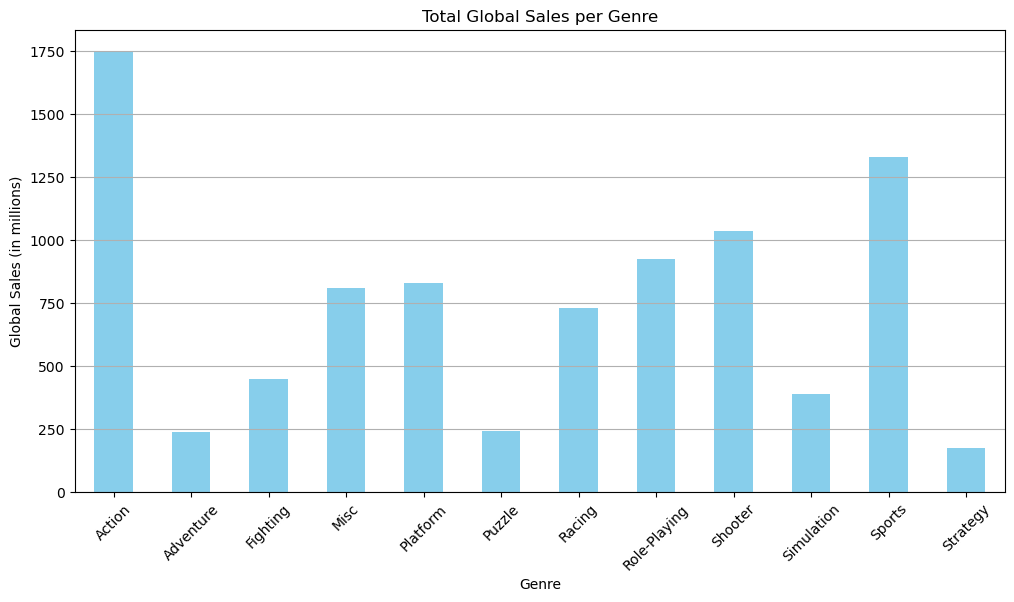

In [73]:
genre_sales = df.groupby('Genre')['Global_Sales'].sum()

plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar', color='skyblue')
plt.title('Total Global Sales per Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

(c) Filter games containing 'Grand Theft Auto'

In [74]:
gta_games = df[df['Name'].str.contains('Grand Theft Auto', case=False, na=False)].copy()
gta_games['EU_JP_Sales'] = gta_games['EU_Sales'] + gta_games['JP_Sales']

gta_selected = gta_games[['Name', 'Platform', 'Year', 'EU_JP_Sales']]
print("\nGrand Theft Auto Games (Selected Columns):")
print(gta_selected.head(10))


Grand Theft Auto Games (Selected Columns):
                                                   Name Platform    Year  \
999                                    Grand Theft Auto       PS  1997.0   
1290                                 Grand Theft Auto 2       PS  1998.0   
1469     Grand Theft Auto: Mission Pack #1, London 1969       PS  1998.0   
2323                               Grand Theft Auto III      PS2  2001.0   
2805                        Grand Theft Auto: Vice City      PS2  2002.0   
3563                               Grand Theft Auto III       PC  2002.0   
3639  Rockstar Games Double Pack: Grand Theft Auto I...       XB  2003.0   
3688  Rockstar Games Double Pack: Grand Theft Auto I...      PS2  2003.0   
4356                        Grand Theft Auto: Vice City       PC  2003.0   
4405                      Grand Theft Auto: San Andreas      PS2  2004.0   

      EU_JP_Sales  
999          1.39  
1290         2.07  
1469         0.04  
2323         4.81  
2805         5.96  

(d) Pie chart of total GTA sales in each region

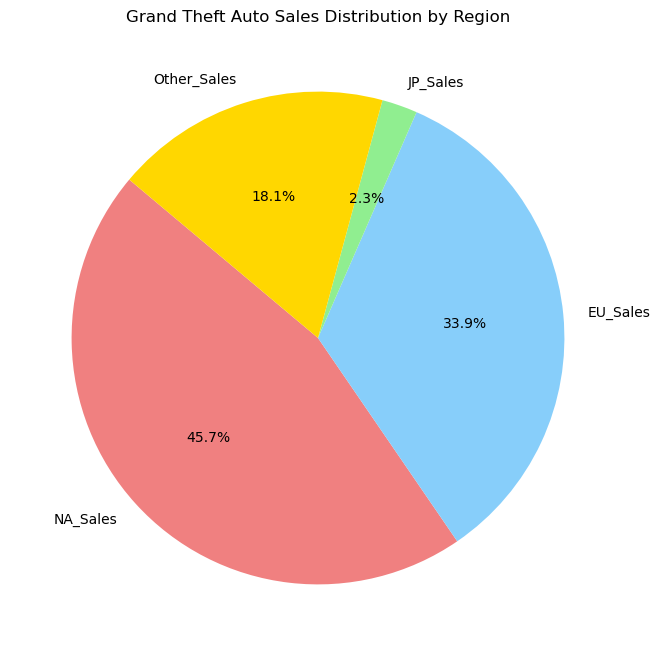

In [75]:
gta_sales = gta_games[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(8, 8))
plt.pie(gta_sales, labels=gta_sales.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'])
plt.title('Grand Theft Auto Sales Distribution by Region')
plt.show()